In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import datetime
from tqdm import tqdm
warnings.filterwarnings('ignore')

#Điểm rèn luyện

In [6]:
drl = pd.read_excel('diemrl.xlsx')
drl.head()

,Unnamed: 0,id,mssv,lopsh,hocky,namhoc,drl,ghichu
0,0,27.0,599DFFB8XPvAibaEXe879+AOg1gh8lJvChSN7o+V,ANTN2013,2.0,2013.0,59.0,NULL
1,1,28.0,FC77E598XPvAibaEXe879+AOg1gh8pb/q8KzJ2A3,ANTN2013,2.0,2013.0,91.0,NULL
2,2,29.0,51E1C3E0XPvAibaEXe+4hxKfaQWuhLp2zzmiiyRe,ANTN2013,2.0,2013.0,93.0,NULL
3,3,30.0,6920B9AAXPvAibaEXe83EtiN4MI2ns6NZhlUAIhE,ANTN2013,2.0,2013.0,69.0,NULL
4,4,31.0,2F237AA9XPvAibaEXe/YKAlYnC3m967dOM4WK2IJ,ANTN2013,2.0,2013.0,72.0,NULL


In [7]:
drl = drl.drop(['Unnamed: 0','id'], axis=1)
drl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54057 entries, 0 to 54056
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mssv    54001 non-null  object 
 1   lopsh   54001 non-null  object 
 2   hocky   54001 non-null  float64
 3   namhoc  54001 non-null  float64
 4   drl     54001 non-null  float64
 5   ghichu  54001 non-null  object 
dtypes: float64(3), object(3)
memory usage: 2.5+ MB


Kiểm tra dữ liệu thiếu

In [8]:
drl.isna().sum()

,0
mssv,56
lopsh,56
hocky,56
namhoc,56
drl,56
ghichu,56


Xóa các dòng dữ liệu thiếu

In [9]:
drl = drl.dropna(how='all')

Giá trị trung bình, tối thiểu, tối đa của các cột dữ liệu số

In [10]:
drl.describe()

,hocky,namhoc,drl
count,54001.000000,54001.000000,54001.000000
mean,1.436418,2017.217477,76.705413
std,0.495945,1.899064,16.486078
min,1.000000,2012.000000,-45.000000
25%,1.000000,2016.000000,68.000000
50%,1.000000,2017.000000,78.000000
75%,2.000000,2019.000000,88.000000
max,2.000000,2020.000000,100.000000


Tạo cột dữ liệu Khoa từ cột lớp sinh hoạt

In [11]:
drl.columns

Index(['mssv', 'lopsh', 'hocky', 'namhoc', 'drl', 'ghichu'], dtype='object')

In [12]:
#https://ctsv.uit.edu.vn/bai-viet/khoa-hoc-lop-sinh-vien-thoi-gian-tiet-hoc
khkttt = ['CNCL', 'CNTT', 'KHDL']
khmt = ['KHMT', 'KHTN', 'KHNT', 'ATTN', 'KHCL']
httt = ['CTTT', 'HTCL', 'HTTT', 'TMCL', 'TMĐT']
ktmt = ['KTMT', 'MTCL', 'MTIO', 'MTLK']
mmtt = ['ATTN', 'ATBC', 'ATCL', 'ATTT', 'MMCL', 'MMTT', 'ANTN', 'ANTT']
cnpm = ['KTPM', 'PMCL']
khoas = ['MMTT', 'KHKTTT', 'HTTT', 'KHMT', 'KTMT', 'CNPM']

In [13]:
def khoa(x):
  x = x.upper()
  try:
    for i in khkttt:
      if i in x:
        return 'KHKTTT'
    for i in khmt:
      if i in x:
        return 'KHMT'
    for i in httt:
      if i in x:
        return 'HTTT'
    for i in ktmt:
      if i in x:
        return 'KTMT'
    for i in mmtt:
      if i in x:
        return 'MMTT'
    for i in cnpm:
      if i in x:
        return 'CNPM'
  except:
    return 'NULL'

In [14]:
drl['khoa'] = drl.lopsh.map(khoa)
drl.head()

,mssv,lopsh,hocky,namhoc,drl,ghichu,khoa
0,599DFFB8XPvAibaEXe879+AOg1gh8lJvChSN7o+V,ANTN2013,2.0,2013.0,59.0,NULL,MMTT
1,FC77E598XPvAibaEXe879+AOg1gh8pb/q8KzJ2A3,ANTN2013,2.0,2013.0,91.0,NULL,MMTT
2,51E1C3E0XPvAibaEXe+4hxKfaQWuhLp2zzmiiyRe,ANTN2013,2.0,2013.0,93.0,NULL,MMTT
3,6920B9AAXPvAibaEXe83EtiN4MI2ns6NZhlUAIhE,ANTN2013,2.0,2013.0,69.0,NULL,MMTT
4,2F237AA9XPvAibaEXe/YKAlYnC3m967dOM4WK2IJ,ANTN2013,2.0,2013.0,72.0,NULL,MMTT


Tạo cột dữ liệu Ngành từ cột lớp sinh hoạt

In [15]:
drl['nganh'] = drl.lopsh.map(lambda x: ''.join((i for i in x if i.isalpha())))
drl.head()

,mssv,lopsh,hocky,namhoc,drl,ghichu,khoa,nganh
0,599DFFB8XPvAibaEXe879+AOg1gh8lJvChSN7o+V,ANTN2013,2.0,2013.0,59.0,NULL,MMTT,ANTN
1,FC77E598XPvAibaEXe879+AOg1gh8pb/q8KzJ2A3,ANTN2013,2.0,2013.0,91.0,NULL,MMTT,ANTN
2,51E1C3E0XPvAibaEXe+4hxKfaQWuhLp2zzmiiyRe,ANTN2013,2.0,2013.0,93.0,NULL,MMTT,ANTN
3,6920B9AAXPvAibaEXe83EtiN4MI2ns6NZhlUAIhE,ANTN2013,2.0,2013.0,69.0,NULL,MMTT,ANTN
4,2F237AA9XPvAibaEXe/YKAlYnC3m967dOM4WK2IJ,ANTN2013,2.0,2013.0,72.0,NULL,MMTT,ANTN


Biểu đồ đường biểu thị điểm rèn luyện mỗi kì trung bình qua các năm

Text(0, 0.5, 'Điểm rèn luyện mỗi kì')

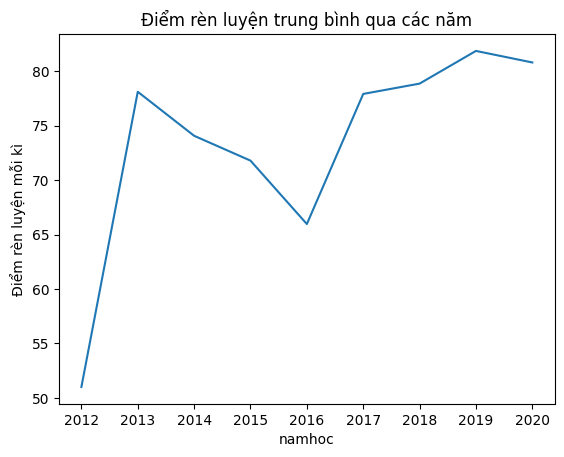

In [16]:
drl.groupby(by=['namhoc']).drl.mean().plot(kind='line', title='Điểm rèn luyện trung bình qua các năm')
plt.ylabel('Điểm rèn luyện mỗi kì')

Biểu đồ cột điểm rèn luyện mỗi kì trung bình của các khoa

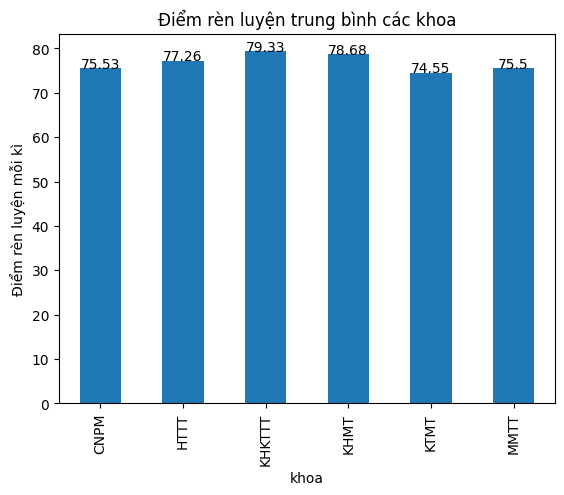

In [17]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

trungbinhkhoa = drl.groupby(by=['khoa']).drl.mean()
trungbinhkhoa.plot(kind='bar', title= 'Điểm rèn luyện trung bình các khoa')
plt.ylabel('Điểm rèn luyện mỗi kì')
addlabels(trungbinhkhoa.index,[round(i,2) for i in trungbinhkhoa.values])

Điểm rèn luyện mỗi kì trung bình của các ngành

Text(0, 0.5, 'Điểm rèn luyện mỗi kì')

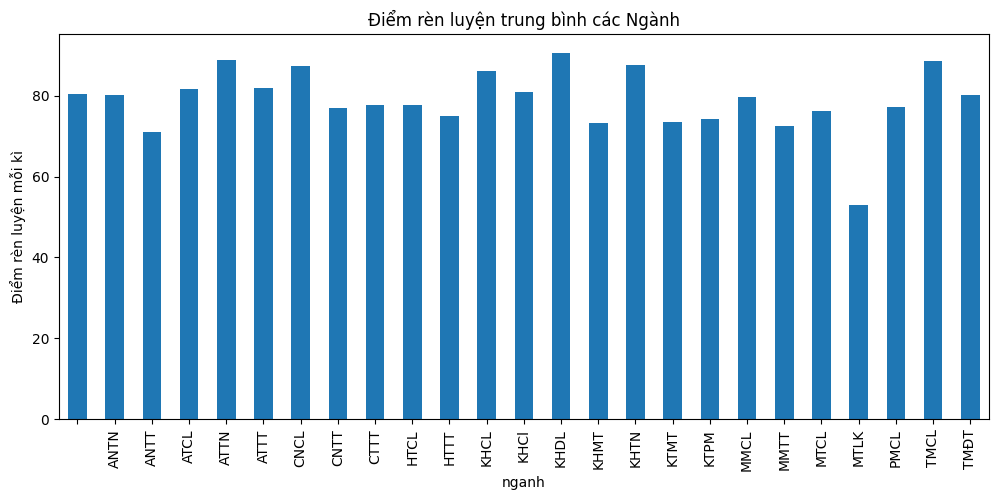

In [20]:
fig, ax = plt.subplots(figsize=(12,5))
drl.groupby(by=['nganh']).drl.mean().plot(kind='bar',title= 'Điểm rèn luyện trung bình các Ngành')
plt.ylabel('Điểm rèn luyện mỗi kì')

Sự biến động điểm rèn luyện mỗi kì qua các năm của các ngành

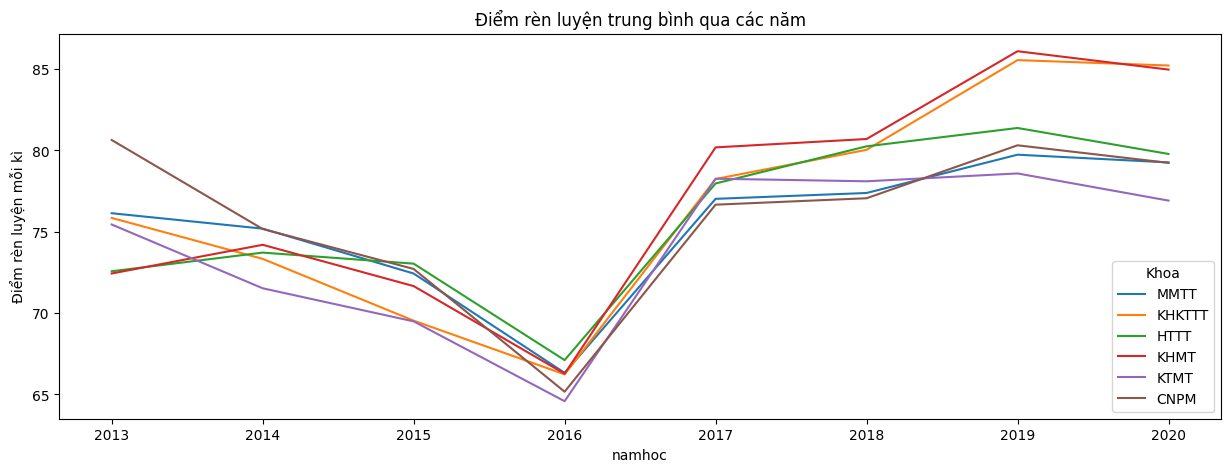

In [19]:
fig, ax = plt.subplots(figsize=(15,5))
for i in khoas:
  drl[drl.khoa== i].groupby('namhoc').drl.mean().plot(kind='line', title='Điểm rèn luyện trung bình qua các năm',label=i)
ax.set_ylabel('Điểm rèn luyện mỗi kì')
ax.legend(title='Khoa')

# Điểm trung bình học kỳ

In [21]:
dtb = pd.read_excel('sinhvien_dtb_hocky.xlsx')
dtb.head()

,mssv,hocky,namhoc,dtbhk,sotchk
0,48685401XPvAibaEXe99yNsueYx+scOnjQSx4nXO,1,2016,6.45,13
1,48685401XPvAibaEXe99yNsueYx+scOnjQSx4nXO,2,2016,5.86,17
2,48685401XPvAibaEXe99yNsueYx+scOnjQSx4nXO,1,2017,6.54,16
3,48685401XPvAibaEXe99yNsueYx+scOnjQSx4nXO,2,2017,5.67,23
4,48685401XPvAibaEXe99yNsueYx+scOnjQSx4nXO,1,2018,2.27,21


Kiểm tra dữ liệu thiếu

In [22]:
dtb.isna().sum()

,0
mssv,0
hocky,0
namhoc,0
dtbhk,0
sotchk,0


In [23]:
dtb.describe()

,hocky,namhoc,dtbhk,sotchk
count,84952.00000,84952.000000,84952.000000,84952.000000
mean,1.52605,2018.440861,6.714582,16.703350
std,0.60096,2.466169,2.049809,6.305202
min,1.00000,2013.000000,0.000000,0.000000
25%,1.00000,2017.000000,6.070000,14.000000
50%,1.00000,2019.000000,7.250000,18.000000
75%,2.00000,2021.000000,8.070000,20.000000
max,3.00000,2022.000000,10.000000,195.000000


Trung bình điểm tổng kết học kỳ qua các năm

Text(0, 0.5, 'Điểm')

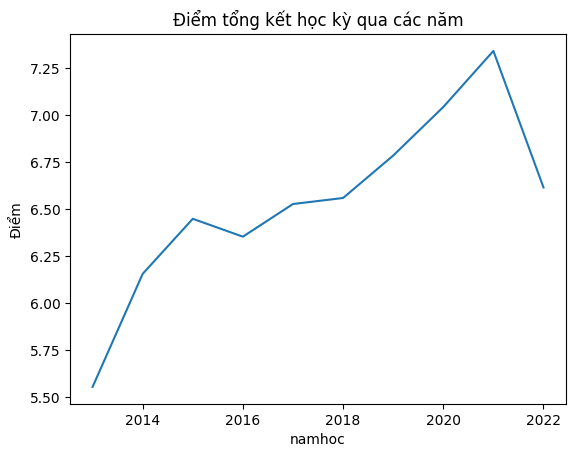

In [24]:
dtb.groupby(by=['namhoc']).dtbhk.mean().plot(kind='line', title='Điểm tổng kết học kỳ qua các năm')
plt.ylabel('Điểm')

Trung bình điểm tổng kết qua các học kỳ (ngoại trừ học kì hè)

Text(0, 0.5, 'Điểm')

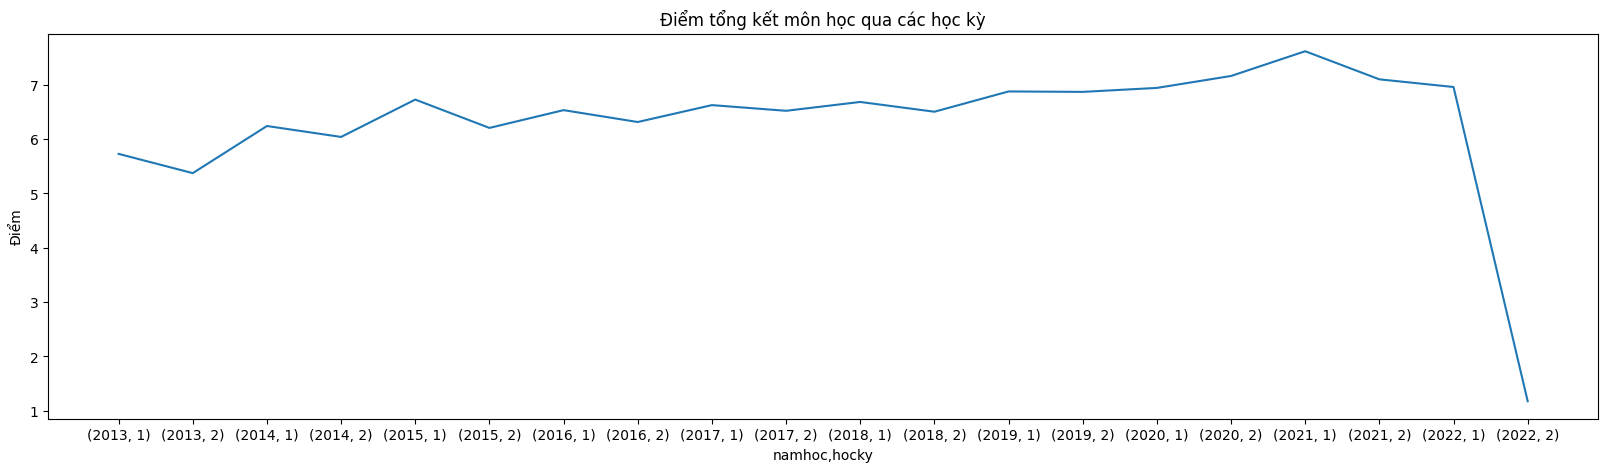

In [25]:
fig, ax = plt.subplots(figsize=(20,5))
tbhocky = dtb[dtb.hocky < 3].groupby(by=['namhoc','hocky']).dtbhk.mean()
tbhocky.plot(kind='line', title='Điểm tổng kết môn học qua các học kỳ')

ax.set_xticks(range(len(tbhocky.index)),tbhocky.index)
plt.ylabel('Điểm')

Nối với bảng dữ liệu DRL để sử dụng các cột lopsh, khoa, nganh ứng với mỗi mssv

In [26]:
dtb = dtb.merge(drl[['mssv','lopsh','khoa','nganh']].drop_duplicates(), on='mssv', how='inner')
dtb = dtb[dtb.nganh != '']
dtb.head()

,mssv,hocky,namhoc,dtbhk,sotchk,lopsh,khoa,nganh
0,48685401XPvAibaEXe99yNsueYx+scOnjQSx4nXO,1,2016,6.45,13,TMĐT2016,HTTT,TMĐT
1,48685401XPvAibaEXe99yNsueYx+scOnjQSx4nXO,2,2016,5.86,17,TMĐT2016,HTTT,TMĐT
2,48685401XPvAibaEXe99yNsueYx+scOnjQSx4nXO,1,2017,6.54,16,TMĐT2016,HTTT,TMĐT
3,48685401XPvAibaEXe99yNsueYx+scOnjQSx4nXO,2,2017,5.67,23,TMĐT2016,HTTT,TMĐT
4,48685401XPvAibaEXe99yNsueYx+scOnjQSx4nXO,1,2018,2.27,21,TMĐT2016,HTTT,TMĐT


Điểm trung bình học kỳ giữa học sinh các khoa

Text(0, 0.5, 'Điểm')

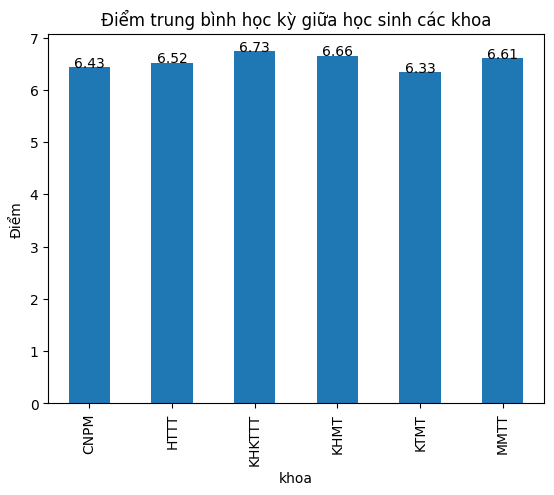

In [27]:
dtbkhoa = dtb.groupby(by=['khoa']).dtbhk.mean()
dtbkhoa.plot(kind='bar', title='Điểm trung bình học kỳ giữa học sinh các khoa')

addlabels(dtbkhoa.index,[round(i,2) for i in dtbkhoa.values])

plt.ylabel('Điểm')

Điểm trung bình học kỳ giữa học sinh các ngành


Text(0, 0.5, 'Điểm')

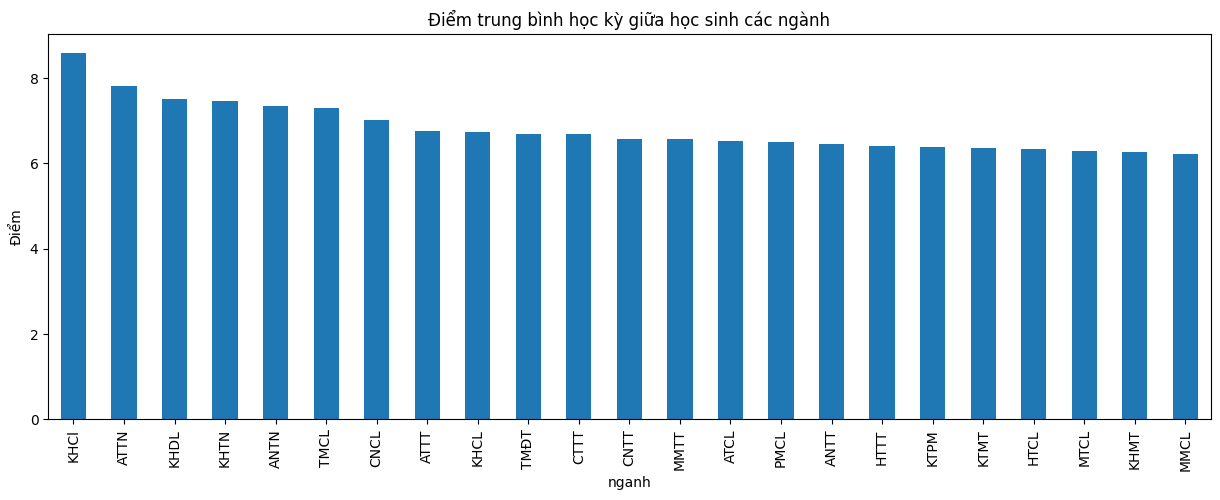

In [28]:
fig, ax = plt.subplots(figsize=(15,5))
dtbnganh = dtb.groupby(by=['nganh']).dtbhk.mean().sort_values(ascending=False)
dtbnganh.plot(kind='bar', title='Điểm trung bình học kỳ giữa học sinh các ngành')
# addlabels(dtbnganh.index,[round(i,2) for i in dtbnganh.values])
ax.set_ylabel('Điểm')

10 lớp có điểm trung bình học kì cao nhất

Text(0, 0.5, 'Điểm')

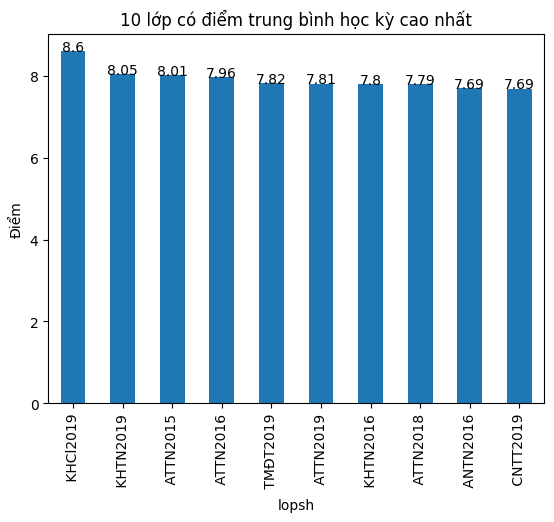

In [29]:
dtblopTop10 = dtb.groupby(by=['lopsh']).dtbhk.mean().sort_values(ascending=False).head(10)
dtblopTop10.plot(kind='bar', title='10 lớp có điểm trung bình học kỳ cao nhất')
addlabels(dtblopTop10.index,[round(i,2) for i in dtblopTop10.values])
plt.ylabel('Điểm')

5 học sinh có điểm trung bình cao nhất

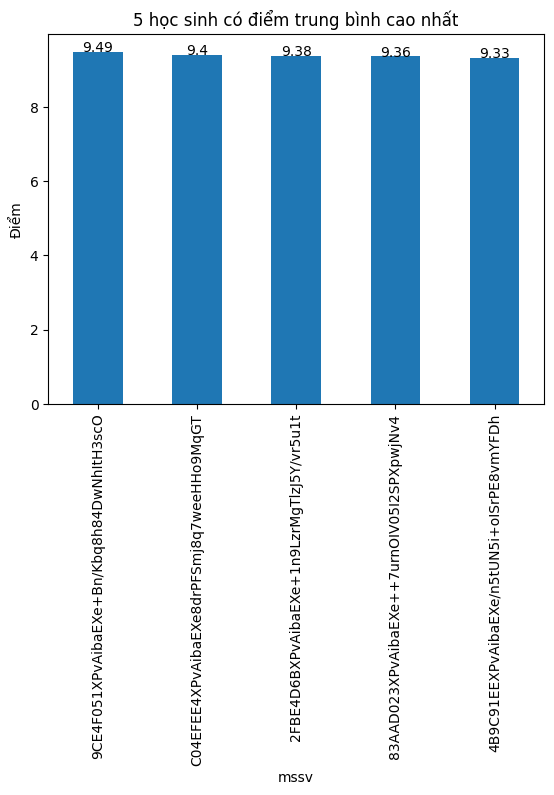

In [30]:
hstop5 = dtb.groupby('mssv').dtbhk.mean().sort_values(ascending=False).head(5)
hstop5.plot(kind='bar',title='5 học sinh có điểm trung bình cao nhất')
plt.ylabel('Điểm')
addlabels(hstop5.index, [round(i,2) for i in hstop5.values])

Sự thay đổi số tín chỉ trung bình qua các năm

<Axes: title={'center': 'Số tín chỉ mỗi kì trung bình qua các năm'}, xlabel='namhoc'>

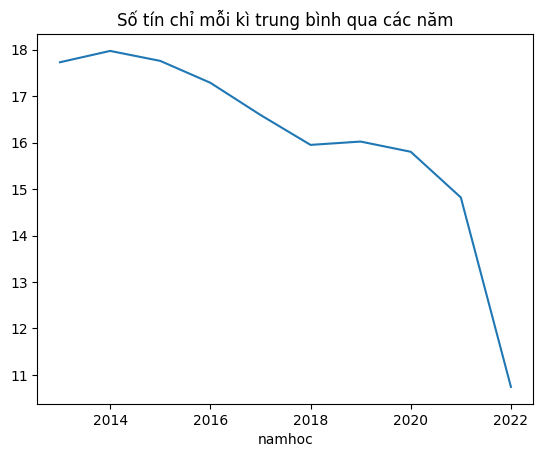

In [31]:
dtb.groupby('namhoc').sotchk.mean().plot(kind='line', title='Số tín chỉ mỗi kì trung bình qua các năm')

#Điểm trung bình môn

In [35]:
diem = pd.read_excel('diem.xlsx')
diem.head()

,id,mssv,mamh,malop,sotc,namhoc,hocky,diem,trangthai,mamh_tt
0,137424.0,31D5D488XPvAibaEXe85Kg8gbEhwbxD0x3mi2el8,CS1113,CS1113.D11,4.0,2012.0,1.0,0.0,2.0,NULL
1,140865.0,31D5D488XPvAibaEXe85Kg8gbEhwbxD0x3mi2el8,PH001,PH001.D11,4.0,2012.0,1.0,0.0,1.0,NULL
2,141624.0,31D5D488XPvAibaEXe85Kg8gbEhwbxD0x3mi2el8,ENGL1113,ENGL1113.D11CTTT,3.0,2012.0,1.0,0.0,2.0,NULL
3,141651.0,31D5D488XPvAibaEXe85Kg8gbEhwbxD0x3mi2el8,ADENG1,ADENG1.D11CTTT,0.0,2012.0,1.0,0.0,2.0,NULL
4,141684.0,31D5D488XPvAibaEXe85Kg8gbEhwbxD0x3mi2el8,SS001,SS001.D11CTTT,5.0,2012.0,1.0,0.0,2.0,NULL


In [36]:
diem.isna().sum()

,0
id,79099
mssv,136
mamh,136
malop,136
sotc,136
namhoc,136
hocky,136
diem,171
trangthai,136
mamh_tt,136


In [37]:
diem = diem.dropna(how= 'all')

Sự thay đổi điểm trung bình các môn qua từng năm

Text(0, 0.5, 'Điểm')

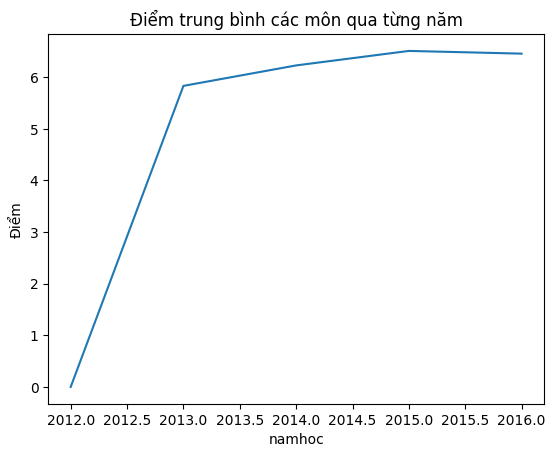

In [38]:
diem.groupby('namhoc').diem.mean().plot(kind='line', title='Điểm trung bình các môn qua từng năm')
plt.ylabel('Điểm')

10 môn học có điểm trung bình cao nhất

Text(0, 0.5, 'Điểm')

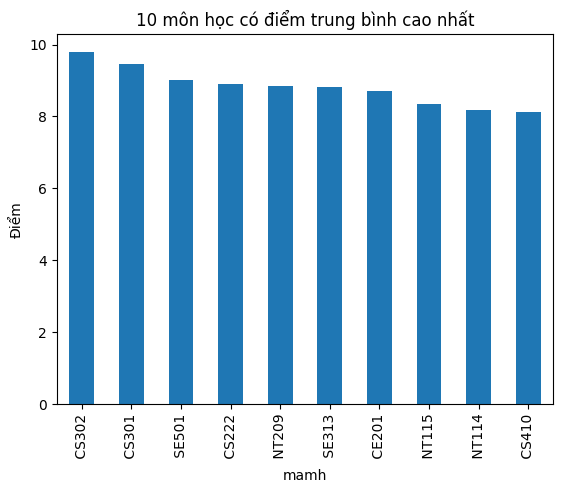

In [39]:
diem.groupby('mamh').diem.mean().sort_values(ascending=False).head(10).plot(kind='bar', title='10 môn học có điểm trung bình cao nhất')
plt.ylabel('Điểm')

10 môn học có điểm trung bình thấp nhất

<Axes: title={'center': '10 môn học có điểm trung bình thấp nhất'}, xlabel='mamh'>

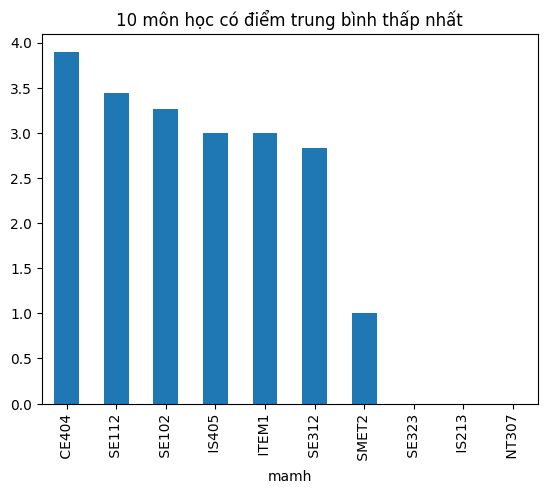

In [40]:
diem.groupby('mamh').diem.mean().sort_values(ascending=False)[-10:].plot(kind='bar', title='10 môn học có điểm trung bình thấp nhất')

Tỉ lệ qua môn chung

In [41]:
sum(diem.diem >= 5) / len(diem)

0.8025120499580651

5 môn có tỉ lệ qua môn cao nhất

Text(0, 0.5, 'Điểm')

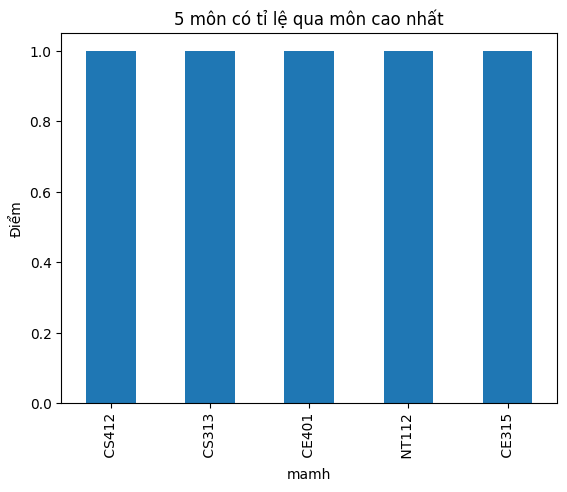

In [42]:
diem.groupby('mamh').diem.apply(lambda x: sum(x >= 5) / len(x)).sort_values(ascending=False).head(5).plot(kind='bar',title='5 môn có tỉ lệ qua môn cao nhất')
plt.ylabel('Điểm')

15 môn có tỉ lệ qua thấp nhất

Text(0, 0.5, 'Điểm')

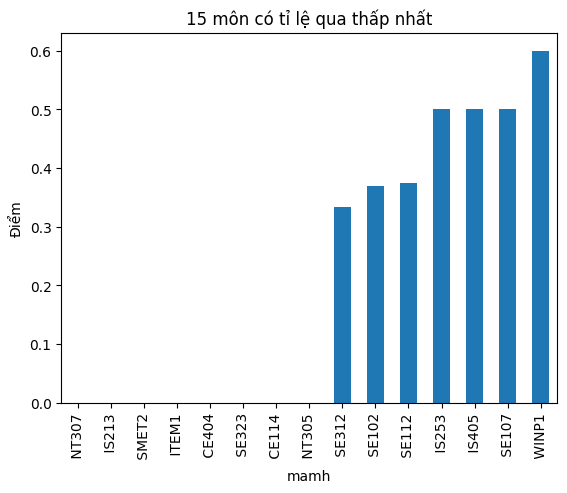

In [43]:
diem.groupby('mamh').diem.apply(lambda x: sum(x >= 5) / len(x)).sort_values().head(15).plot(kind='bar',title='15 môn có tỉ lệ qua thấp nhất')
plt.ylabel('Điểm')

# Xếp loại av đầu vào

In [44]:
dv = pd.read_excel('xeploaiav.xlsx')
dv.head()

,id,mssv,listening,reading,total,mamh,ghichu
0,1.0,DA75FFFEXPvAibaEXe8808q51BnmQhHT8REwWMQJ,NULL,NULL,15.0,NULL,NULL
1,2.0,336B9F53XPvAibaEXe/jd8ghaf1GTNPSHNuhAHTZ,NULL,NULL,15.0,NULL,NULL
2,3.0,67A51DC3XPvAibaEXe/7YVAxOsMwOtCFvKInEQ0e,NULL,NULL,16.0,NULL,NULL
3,4.0,387E2EFEXPvAibaEXe96K1aB3B4cKSj8mKKciukN,NULL,NULL,16.0,NULL,NULL
4,6.0,13D900A2XPvAibaEXe97wmuqTYuV7bJOKimbzKxM,NULL,NULL,18.0,NULL,NULL


In [45]:
dv.isna().sum()

,0
id,6
mssv,6
listening,6
reading,6
total,6
mamh,6
ghichu,6


In [46]:
dv = dv.dropna(how='all')

##### Sinh viên tham gia thi ta đầu vào

In [47]:
thi = dv[list('null' in x.lower() for x in dv.ghichu.to_string().split('\n'))]
thi

,id,mssv,listening,reading,total,mamh,ghichu
0,1.0,DA75FFFEXPvAibaEXe8808q51BnmQhHT8REwWMQJ,NULL,NULL,15.0,NULL,NULL
1,2.0,336B9F53XPvAibaEXe/jd8ghaf1GTNPSHNuhAHTZ,NULL,NULL,15.0,NULL,NULL
2,3.0,67A51DC3XPvAibaEXe/7YVAxOsMwOtCFvKInEQ0e,NULL,NULL,16.0,NULL,NULL
3,4.0,387E2EFEXPvAibaEXe96K1aB3B4cKSj8mKKciukN,NULL,NULL,16.0,NULL,NULL
4,6.0,13D900A2XPvAibaEXe97wmuqTYuV7bJOKimbzKxM,NULL,NULL,18.0,NULL,NULL
...,...,...,...,...,...,...,...
6344,6383.0,E8A5FA8CXPvAibaEXe/31hnRTOucclruvJrLqfHH,27,32,59.0,ENG01,NULL
6345,6384.0,B3487295XPvAibaEXe8iDpfibljbVHQ0k0Q2Ad15,28,41,69.0,ENG02,NULL
6346,6385.0,9166AE22XPvAibaEXe+V8Z3g2JN9F+ODXiTHI+x2,27,44,71.0,ENG02,NULL
6347,6386.0,2A792560XPvAibaEXe9gkNN06c3nLV4jpNl00QZq,30,26,56.0,ENG01,NULL


Phân bố điểm thi tiếng anh đầu vào

Text(0, 0.5, 'Số lượng')

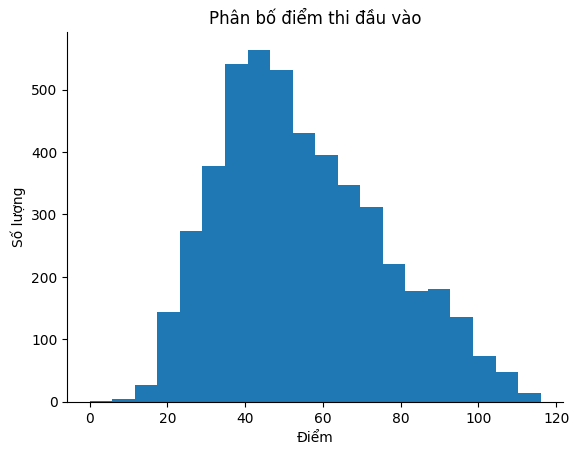

In [48]:
thi['total'].plot(kind='hist', bins=20, title='Phân bố điểm thi đầu vào')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.xlabel('Điểm')
plt.ylabel('Số lượng')

Số lượng sinh viên được phân với mỗi môn tiếng anh đầu vào

Text(0, 0.5, 'Số lượng')

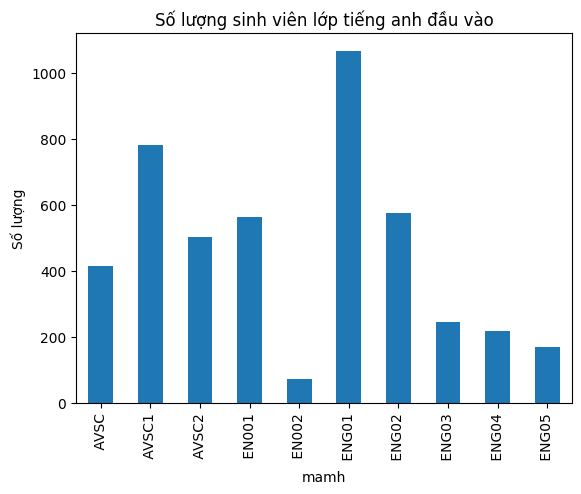

In [49]:
thi[thi.mamh != ' NULL'].groupby('mamh').total.count().plot(kind='bar', title='Số lượng sinh viên lớp tiếng anh đầu vào')
plt.ylabel('Số lượng')

##### Sinh viên nộp chứng chỉ thay thế kì thi đầu vào

In [50]:
toe = dv[list('null' not in x.lower() for x in dv.ghichu.to_string().split('\n'))]
toe

,id,mssv,listening,reading,total,mamh,ghichu
3379,3420.0,4784C672XPvAibaEXe9Tdz4CswjA16eg3cXIH7xa,47,69,630.0,ENG05,Qui đổi TOEIC
3380,3421.0,280F7F2EXPvAibaEXe/TOGeH6x1BlQUztAN4ABTM,45,68,610.0,Miễn ENG03,Qui đổi TOEIC
3381,3422.0,3A16B235XPvAibaEXe8NM1/5chXJmoMJkfAtL/mC,46,67,610.0,Miễn ENG03,Qui đổi TOEIC
3382,3423.0,0F92557CXPvAibaEXe9176253k6Mv7DsmZGZMkgF,45,67,605.0,Miễn ENG03,Qui đổi TOEIC
3383,3424.0,C6BEEDEBXPvAibaEXe/Hd2nFsMs4VJMEohtoTdvd,44,68,605.0,Miễn ENG03,Qui đổi TOEIC
...,...,...,...,...,...,...,...
4921,4961.0,6EC9B467XPvAibaEXe+g4B5cywZjwZVD7kCf00e1,14,19,180.0,AVSC1,'Qui đổi TOEIC'
4922,4962.0,5DED219EXPvAibaEXe+g4B5cywZjwcehNH9APFMj,21,15,195.0,AVSC1,'Qui đổi TOEIC'
4923,4963.0,794F4933XPvAibaEXe8YD29zP3MXDwVlPj1MfWns,17,21,205.0,AVSC1,'Qui đổi TOEIC'
4924,4964.0,3BC1E78EXPvAibaEXe9zkQY6ucuvgG+vVB9Kue9g,28,32,325.0,ENG01,'Qui đổi TOEIC'


Phân bố điểm TOEIC đầu vào

Text(0, 0.5, 'Số lượng')

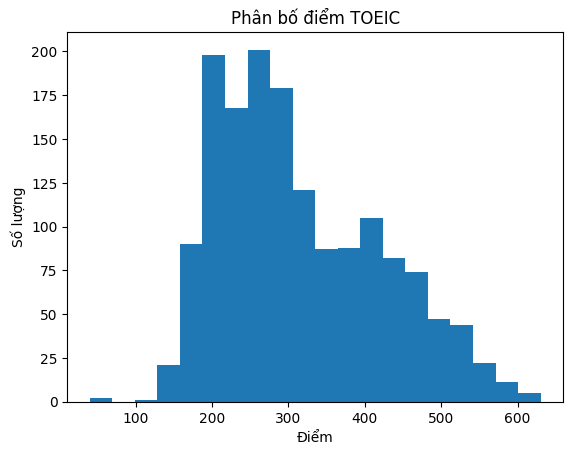

In [51]:
toe.total.plot(kind='hist',bins=20, title='Phân bố điểm TOEIC')
# plt.gca().spines[['top', 'right',]].set_visible(False)
plt.xlabel('Điểm')
plt.ylabel('Số lượng')

Số lượng sinh viên được phân với mỗi môn tiếng anh đầu vào

Text(0, 0.5, 'Số lượng')

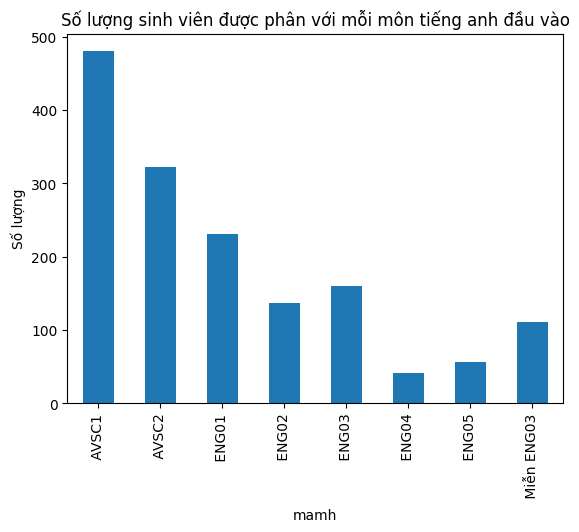

In [52]:
toe[toe.mamh != ' '].groupby('mamh').total.count().plot(kind='bar', title='Số lượng sinh viên được phân với mỗi môn tiếng anh đầu vào')
plt.ylabel('Số lượng')

# Chứng chỉ

In [53]:
cc = pd.read_excel('sinhvien_chungchi.xlsx')
cc.head()

,Unnamed: 0,id,mssv,ngaythi,url,loaixn,listening,speaking,reading,writing,tongdiem,lydo,trangthai,ngayxl,column0,Column1,Column2
0,0,6.0,12C24162XPvAibaEXe9Xnw4t0GPgx9K2sCLXkxKl,NaN,bangcap/13521066/13521066_bangcap_TOIEC_201706...,TOIEC,NaN,NaN,NaN,NaN,NaN,NaN,1,2017-09-08 13:56:09,NaT,NaN,NaN
1,1,8.0,9095EEE4XPvAibaEXe93PEySAJOVk2kOrJQCpxlr,NaN,bangcap/13520021/13520021_bangcap_TOIEC_201707...,TOIEC,NaN,NaN,NaN,NaN,NaN,NaN,1,2017-09-08 13:55:15,NaT,NaN,NaN
2,2,13.0,538FDEFEXPvAibaEXe9P07hcrvmhCe3unM2XvNXE,NaN,bangcap/13520066/13520066_bangcap_TOIEC_201707...,TOIEC,NaN,NaN,NaN,NaN,NaN,NaN,1,2017-09-08 13:55:27,NaT,NaN,NaN
3,3,14.0,82EB45E9XPvAibaEXe9eSUilQ3V71rLMOFZnU1bQ,NaN,bangcap/13520828/13520828_bangcap_TOIEC_201707...,TOIEC,NaN,NaN,NaN,NaN,NaN,NaN,1,2017-09-08 13:56:00,NaT,NaN,NaN
4,4,15.0,DDB9E00CXPvAibaEXe/Xn8KZjn44cdZNDzzd5bIQ,NaN,bangcap/13520576/13520576_bangcap_TOIEC_201707...,TOIEC,NaN,NaN,NaN,NaN,NaN,NaN,1,2017-09-08 13:55:51,NaT,NaN,NaN


In [54]:
cc.isna().sum()

,0
Unnamed: 0,0
id,10
mssv,10
ngaythi,544
url,10
loaixn,10
listening,1102
speaking,3112
reading,1104
writing,3112


Bỏ 2 cột dữ liệu không cần thiết

In [55]:
cc = cc.drop(columns=['Unnamed: 0','id'])
cc.head()

,mssv,ngaythi,url,loaixn,listening,speaking,reading,writing,tongdiem,lydo,trangthai,ngayxl,column0,Column1,Column2
0,12C24162XPvAibaEXe9Xnw4t0GPgx9K2sCLXkxKl,NaN,bangcap/13521066/13521066_bangcap_TOIEC_201706...,TOIEC,NaN,NaN,NaN,NaN,NaN,NaN,1,2017-09-08 13:56:09,NaT,NaN,NaN
1,9095EEE4XPvAibaEXe93PEySAJOVk2kOrJQCpxlr,NaN,bangcap/13520021/13520021_bangcap_TOIEC_201707...,TOIEC,NaN,NaN,NaN,NaN,NaN,NaN,1,2017-09-08 13:55:15,NaT,NaN,NaN
2,538FDEFEXPvAibaEXe9P07hcrvmhCe3unM2XvNXE,NaN,bangcap/13520066/13520066_bangcap_TOIEC_201707...,TOIEC,NaN,NaN,NaN,NaN,NaN,NaN,1,2017-09-08 13:55:27,NaT,NaN,NaN
3,82EB45E9XPvAibaEXe9eSUilQ3V71rLMOFZnU1bQ,NaN,bangcap/13520828/13520828_bangcap_TOIEC_201707...,TOIEC,NaN,NaN,NaN,NaN,NaN,NaN,1,2017-09-08 13:56:00,NaT,NaN,NaN
4,DDB9E00CXPvAibaEXe/Xn8KZjn44cdZNDzzd5bIQ,NaN,bangcap/13520576/13520576_bangcap_TOIEC_201707...,TOIEC,NaN,NaN,NaN,NaN,NaN,NaN,1,2017-09-08 13:55:51,NaT,NaN,NaN


In [56]:
cc.describe()

,listening,speaking,reading,writing,column0,Column1
count,2298.000000,288.000000,2296.000000,288.000000,10,2.0
mean,314.917319,112.638889,291.175958,116.875000,2020-06-03 07:49:54.800000,-1.0
min,125.000000,70.000000,110.000000,90.000000,2018-02-02 09:46:04,-1.0
25%,255.000000,100.000000,230.000000,105.000000,2020-07-13 10:44:09,-1.0
50%,305.000000,110.000000,280.000000,115.000000,2021-02-24 09:53:43.500000,-1.0
75%,365.000000,125.000000,345.000000,125.000000,2021-02-24 09:54:16,-1.0
max,495.000000,175.000000,495.000000,190.000000,2021-03-11 08:20:00,-1.0
std,78.251835,21.151061,76.706795,18.268945,NaN,0.0


Các loại chứng chỉ

Text(0, 0.5, 'Số lượng')

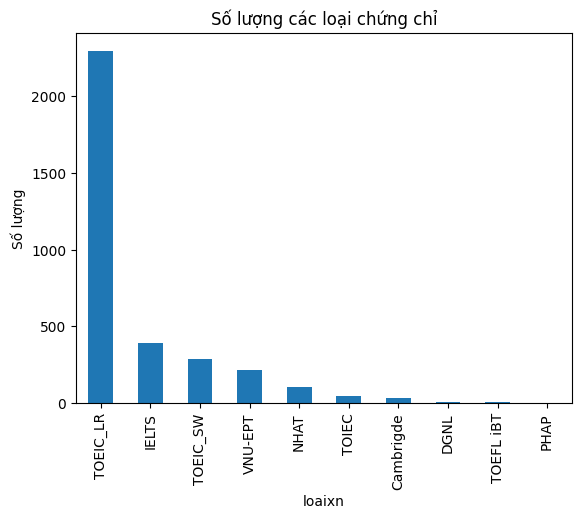

In [57]:
cc.loaixn.value_counts().plot(kind='bar',title='Số lượng các loại chứng chỉ')
plt.ylabel('Số lượng')

Tạo cột dữ liệu năm thi chứng chỉ

In [58]:
cc.ngaythi = pd.to_datetime(cc.ngaythi, format='%Y-%m-%d')
cc['nam'] = cc.ngaythi.dt.year
cc[309:314]

,mssv,ngaythi,url,loaixn,listening,speaking,reading,writing,tongdiem,lydo,trangthai,ngayxl,column0,Column1,Column2,nam
309,A3432242XPvAibaEXe8dZIB3odxynvRsIZuhEiHG,2018-04-05,bangcap/14520734/14520734_bangcap_TOEIC_LR_201...,TOEIC_LR,330.0,NaN,340.0,NaN,NaN,NaN,1,2019-04-12 15:27:54,NaT,NaN,NaN,2018.0
310,CC66FB5EXPvAibaEXe/wvgrdNVCyf4qaNhqyOjdc,2019-01-27,bangcap/15520902/15520902_bangcap_TOEIC_LR_201...,TOEIC_LR,220.0,NaN,235.0,NaN,NaN,NaN,1,2019-04-12 15:27:35,NaT,NaN,NaN,2019.0
311,38DFAA3AXPvAibaEXe8n5o9RyAxUM97aRIy9CFct,NaT,https://qldt.uit.edu.vn/sites/default/files/si...,TOEIC_LR,280.0,NaN,185.0,NaN,NaN,NaN,1,2019-04-12 15:26:06,NaT,NaN,NaN,NaN
312,5C1A7772XPvAibaEXe+3zE134gecv2Qv5K/22COb,NaT,https://qldt.uit.edu.vn/sites/default/files/si...,TOEIC_LR,330.0,NaN,310.0,NaN,NaN,NaN,1,2019-04-12 15:25:37,NaT,NaN,NaN,NaN
313,1514F52EXPvAibaEXe82B8VnNvUD6CkE/QMvqqSy,NaT,https://qldt.uit.edu.vn/sites/default/files/si...,TOEIC_LR,405.0,NaN,310.0,NaN,NaN,NaN,1,2019-04-12 15:25:13,NaT,NaN,NaN,NaN


##### TOEIC

Điểm TOEIC nghe và đọc qua các năm

Text(0, 0.5, 'Điểm')

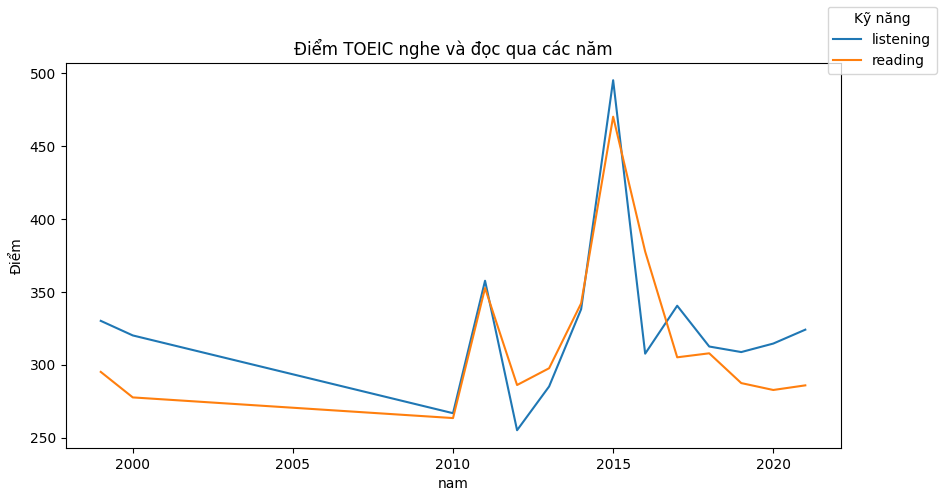

In [59]:
fig, ax = plt.subplots(figsize=(10,5))
cc[cc.loaixn == 'TOEIC_LR'].groupby('nam').listening.mean().plot(kind='line',label='listening')
cc[cc.loaixn == 'TOEIC_LR'].groupby('nam').reading.mean().plot(kind='line',label='reading')
fig.legend(title='Kỹ năng')
ax.set_title('Điểm TOEIC nghe và đọc qua các năm')
ax.set_ylabel('Điểm')

Điểm TOEIC nghe và đọc qua các năm

Text(0.5, 1.0, 'Điểm TOEIC nói và nghe qua các năm')

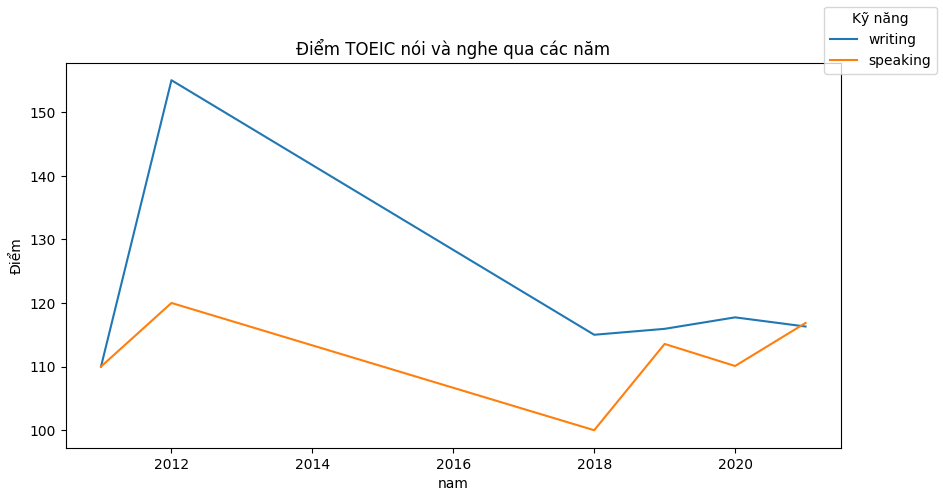

In [60]:
fig, ax =plt.subplots(figsize = (10,5))
cc[cc.loaixn == 'TOEIC_SW'].groupby('nam').writing.mean().plot(kind='line',label='writing')
cc[cc.loaixn == 'TOEIC_SW'].groupby('nam').speaking.mean().plot(kind='line',label='speaking')
fig.legend(title='Kỹ năng')
ax.set_ylabel('Điểm')
ax.set_title('Điểm TOEIC nói và nghe qua các năm')

##### IELTS

In [61]:
iel = cc[cc.loaixn == 'IELTS']
iel.tongdiem = [float(x) for x in iel.tongdiem]

In [62]:
iel.tongdiem.value_counts()

,count
tongdiem,
6.0,38
5.5,24
7.0,22
6.5,20
7.5,14
5.0,10
4.5,2
29.5,2


Loại bỏ dữ liệu nhiễu

In [63]:
iel = iel[iel.tongdiem <= 9.0]

Số lượng chứng chỉ ứng với mỗi mức điểm

Text(0, 0.5, 'Số lượng')

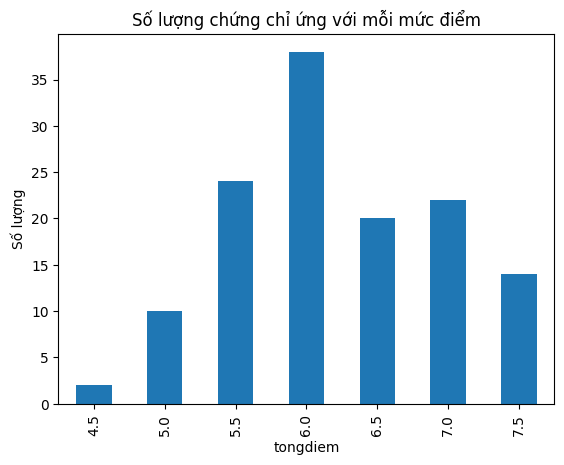

In [64]:
iel.groupby('tongdiem').mssv.count().plot(kind='bar',title='Số lượng chứng chỉ ứng với mỗi mức điểm')
plt.ylabel('Số lượng')

Sự thay đổi điểm chứng chỉ IELTS qua các năm

Text(0, 0.5, 'Điểm')

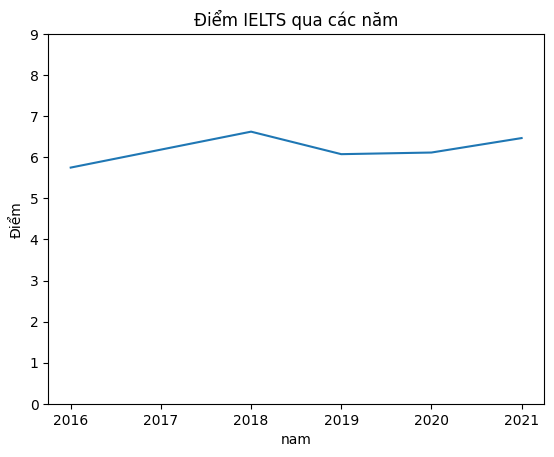

In [65]:
ax = plt.gca()
ax.set_ylim([0,9])
iel.groupby('nam').tongdiem.mean().plot(kind='line',title='Điểm IELTS qua các năm')
ax.set_ylabel('Điểm')

# Tốt nghiệp

In [67]:
tn = pd.read_excel('totnghiep.xlsx')
tn.head()

,id,mssv,xeploai,soquyetdinh,ngaycapvb
0,76328.0,E95E7C6DXPvAibaEXe+1j/AqdkpM22DHf6P99fDJ,Khá,178/QĐ_ĐHCNTT,14/04/2017
1,76663.0,D0FE4969XPvAibaEXe/yXiKgsgy0slCmJ5EKt6Ki,Giỏi,713/QĐ_ĐHCNTT,06/10/2017
2,76664.0,40F7E8D0XPvAibaEXe+nZBq3b0XEhfcwXLmoc4Pj,Giỏi,713/QĐ_ĐHCNTT,06/10/2017
3,76665.0,0A049F45XPvAibaEXe9CtFSNMbfIz9qE7i0Fu4My,Khá,713/QĐ_ĐHCNTT,06/10/2017
4,76666.0,7A7166DAXPvAibaEXe83V/kFvw2bBZ0o/KVHZc30,Khá,713/QĐ_ĐHCNTT,06/10/2017


In [68]:
tn.isna().sum()

,0
id,2
mssv,2
xeploai,2
soquyetdinh,2
ngaycapvb,2


In [69]:
tn = tn.dropna()
tn = tn.reset_index(drop=True)

In [70]:
tn[' xeploai'].unique()

array([' Khá', ' Giỏi', ' Trung bình khá', ' Xuất sắc', ' Trung bình Khá',
       ' TB Khá', ' TB khá'], dtype=object)

In [71]:
tn[' xeploai'] = tn[' xeploai'].map(lambda x: x.upper())

Số lượng sinh viên tốt nghiệp mỗi xếp loại

Text(0, 0.5, 'Số lượng')

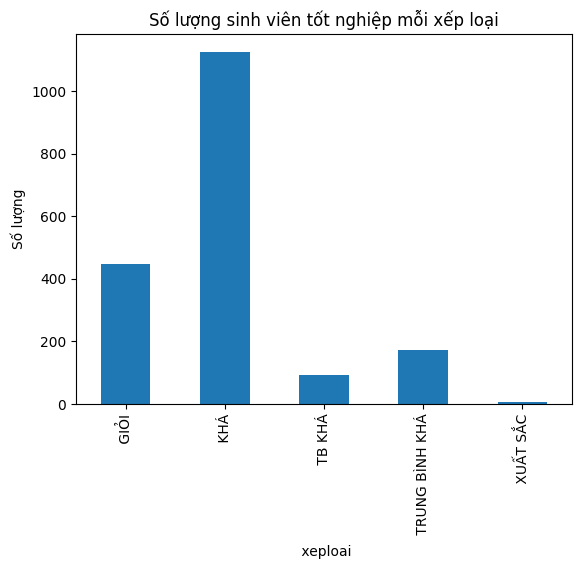

In [72]:
tn.groupby(' xeploai').mssv.count().plot(kind='bar', title='Số lượng sinh viên tốt nghiệp mỗi xếp loại')
plt.ylabel('Số lượng')

Tỉ lệ mỗi xếp loại tốt nghiệp

Text(0.5, 1.0, 'Tỉ lệ mỗi xếp loại tốt nghiệp')

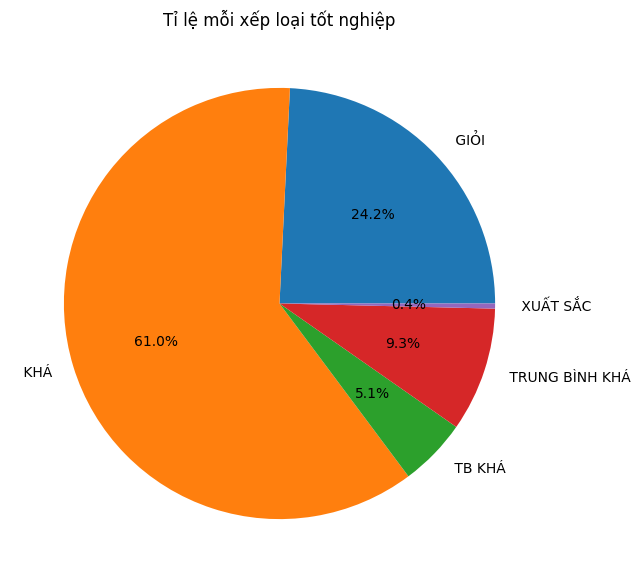

In [74]:
fig, ax = plt.subplots(figsize=(7,7))
# tn.groupby(' xeploai').mssv.count().plot(kind='pie', title='Tỉ lệ mỗi xếp loại tốt nghiệp')
tiLeXepLoai = tn.groupby(' xeploai').mssv.count() / tn.mssv.count()

ax.pie(tiLeXepLoai, labels=tiLeXepLoai.index, autopct='%1.1f%%')
ax.set_title('Tỉ lệ mỗi xếp loại tốt nghiệp')

Tạo cột dữ liệu năm tốt nghiệp

In [75]:
tn['nam'] =  tn[' ngaycapvb'].map(lambda x: datetime.datetime.strptime(x[1:11], '%d/%m/%Y').year)

Tổng số lượng sinh viên tốt nghiệp mỗi năm

Text(0, 0.5, 'Số lượng')

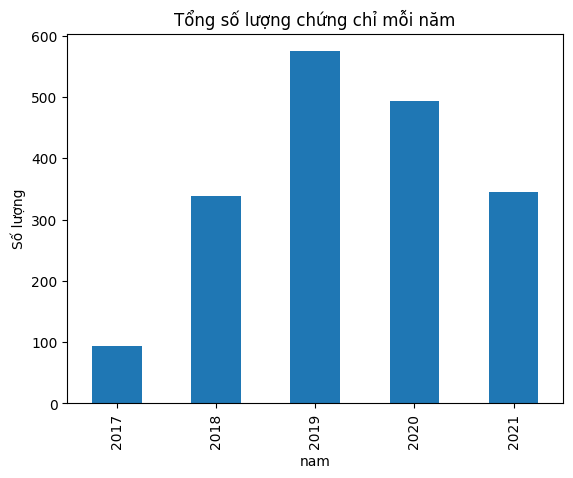

In [76]:
tn.groupby('nam').mssv.count().plot(kind='bar', title='Tổng số lượng chứng chỉ mỗi năm')
plt.ylabel('Số lượng')

In [77]:
tn = tn.sort_values('nam', ascending=True)

Tỉ lệ xếp loại tốt nghiệp qua các năm

Text(0.5, 1.0, 'Tỉ lệ xếp loại tốt nghiệp qua các năm')

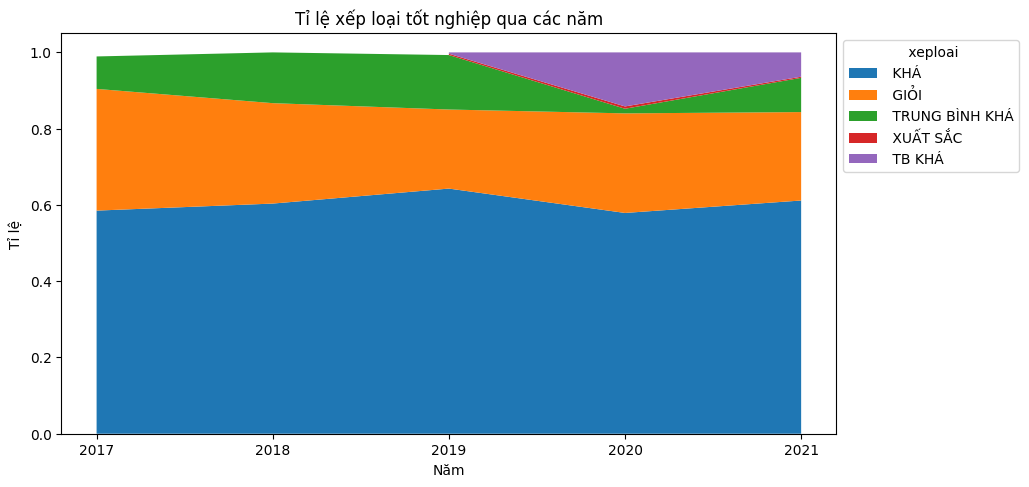

In [78]:
fig, ax = plt.subplots(figsize=(10, 5.2))

stacks = []
for loai in tn[' xeploai'].unique():
  stacks.append(tn[tn[' xeploai'] == loai].groupby('nam').mssv.count() / tn.groupby('nam').mssv.count())

ax.set_xticks(stacks[0].index)
plt.stackplot(stacks[0].index, stacks, labels=tn[' xeploai'].unique())
ax.legend(title=' xeploai', bbox_to_anchor=(1, 1), loc='upper left')
ax.set_ylabel('Tỉ lệ')
ax.set_xlabel('Năm')
ax.set_title('Tỉ lệ xếp loại tốt nghiệp qua các năm')